In [2]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [3]:
file_path = "./merged_file.json"

with open(file_path, 'r') as file:
    json_data = file.read()

In [4]:
data = json.loads(json_data)

width_list = []
height_list = []

for item in data:
    for slot in item['item']['slots']:
        width_list.append(slot['width'])
        height_list.append(slot['height'])

# print("Width List:", width_list)
# print("Height List:", height_list)

Width List: [951, 1429, 1311, 924, 838, 1609, 1412, 951, 1361, 2343, 1196, 1185, 1491, 990, 951, 789, 906, 939, 2338, 1311, 1224, 769, 1224, 2878, 985, 828, 1301, 951, 1562, 664, 1025, 2881, 1026, 2343, 2336, 768, 1640, 983, 905, 1420, 1429, 1356, 1420, 1492, 950, 1412, 1058, 1413, 830, 2409, 980, 1185, 2032, 930, 1607, 1417, 2409, 829, 951, 2424, 949, 1592, 981, 990, 1225, 972, 1458, 2406, 2424, 827, 2331, 2642, 1315, 970, 790, 789, 841, 1615, 2425, 1376, 949, 1199, 790, 990, 1383, 1318, 2262, 982, 1443, 971, 1591, 2410, 1371, 2834, 831, 2408, 1190, 2425, 1057, 980, 2880, 991, 768, 2884, 1414, 1240, 1026, 1318, 1312, 1077, 1297, 974, 948, 1185, 1386, 2426, 1383, 1008, 3044, 769, 831, 2746, 906, 1440, 1063, 2636, 2635, 1076, 1210, 3044, 702, 1025, 1153, 2966, 705, 1108, 1225, 945, 598, 1139, 2024, 1569, 664, 2036, 1198, 738, 2871, 661, 1224, 1177, 1218, 2844, 1063, 1197, 907, 2033, 736, 989, 1063, 1557, 2626, 1241, 974, 596, 1062, 945, 905, 2966, 1009, 1064, 1550, 1063, 2584, 597, 1198

# Datos generales

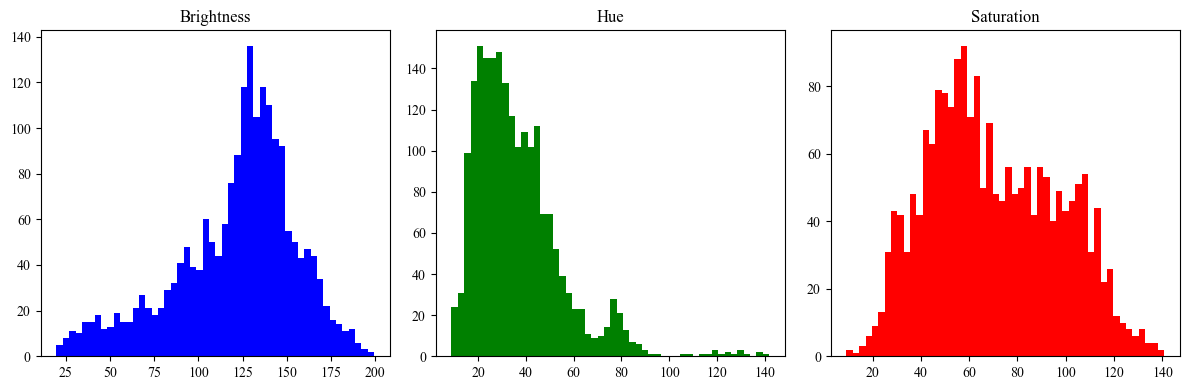

In [46]:
def extract_features(image):
    hsv_image = image.convert('HSV')
    h, s, v = hsv_image.split()
    brightness = np.mean(np.array(v))
    hue = np.mean(np.array(h))
    saturation = np.mean(np.array(s))
    
    return brightness, hue, saturation

def analyze_images(folder_path):
    brightness_values = []
    hue_values = []
    saturation_values = []
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        if os.path.isfile(image_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image = Image.open(image_path)
            brightness, hue, saturation = extract_features(image)
            brightness_values.append(brightness)
            hue_values.append(hue)
            saturation_values.append(saturation)
    
    return brightness_values, hue_values, saturation_values

if __name__ == "__main__":
    folder_path = "images"
    
    brightness_values, hue_values, saturation_values = analyze_images(folder_path)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.hist(brightness_values, bins=50, color='b')
    plt.title('Brightness')
    plt.subplot(1, 3, 2)
    plt.hist(hue_values, bins=50, color='g')
    plt.title('Hue')
    plt.subplot(1, 3, 3)
    plt.hist(saturation_values, bins=50, color='r')
    plt.title('Saturation')
    plt.tight_layout()
    plt.show()

# Ancho y Alto de imagenes

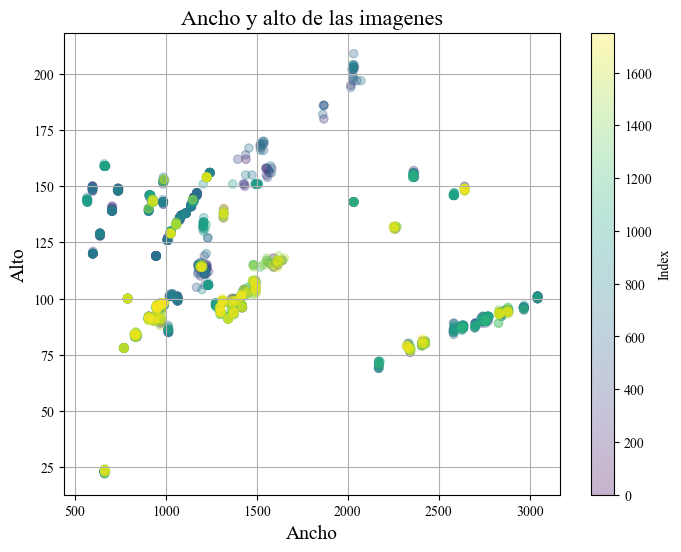

In [27]:
matplotlib.rcParams['font.family'] = 'Times New Roman'
colors = range(len(width_list))
plt.figure(figsize=(8, 6))
plt.scatter(width_list, height_list, c=colors, cmap='viridis', alpha=0.3)
plt.colorbar(label='Index')
plt.title('Ancho y alto de las imagenes', fontsize=16)
plt.xlabel('Ancho', fontsize=14)
plt.ylabel('Alto', fontsize=14)
plt.grid(True)
plt.show()

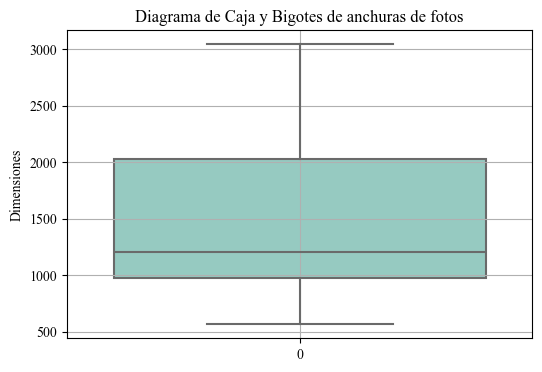

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=width_list, palette='Set3')
plt.title('Diagrama de Caja y Bigotes de anchuras de fotos')
# plt.xticks([0, 1], ['Ancho', 'Alto'])
plt.ylabel('Dimensiones')
plt.grid(True)
plt.show()


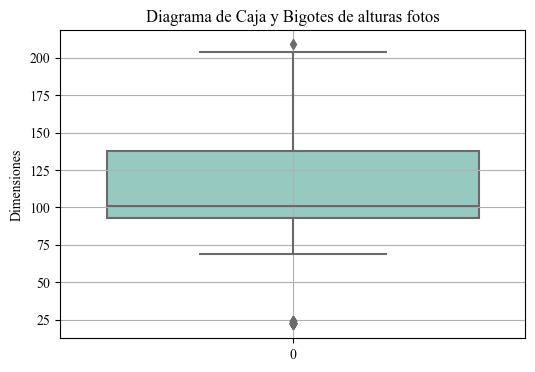

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=height_list, palette='Set3')
plt.title('Diagrama de Caja y Bigotes de alturas fotos')
plt.ylabel('Dimensiones')
plt.grid(True)
plt.show()

# Bounding Boxes

In [30]:
bounding_box_widths = []
bounding_box_heights = []
bounding_box_counts = []
category_counts = {}

for item in data:
    annotations = item.get('annotations', [])
    bounding_box_counts.append(len(annotations))  # Cantidad de bounding boxes por imagen
    for annotation in annotations:
        bounding_box = annotation.get('bounding_box', {})
        bounding_box_widths.append(bounding_box.get('w', 0))
        bounding_box_heights.append(bounding_box.get('h', 0))
        category = annotation.get('name', 'Unknown')
        category_counts[category] = category_counts.get(category, 0) + 1

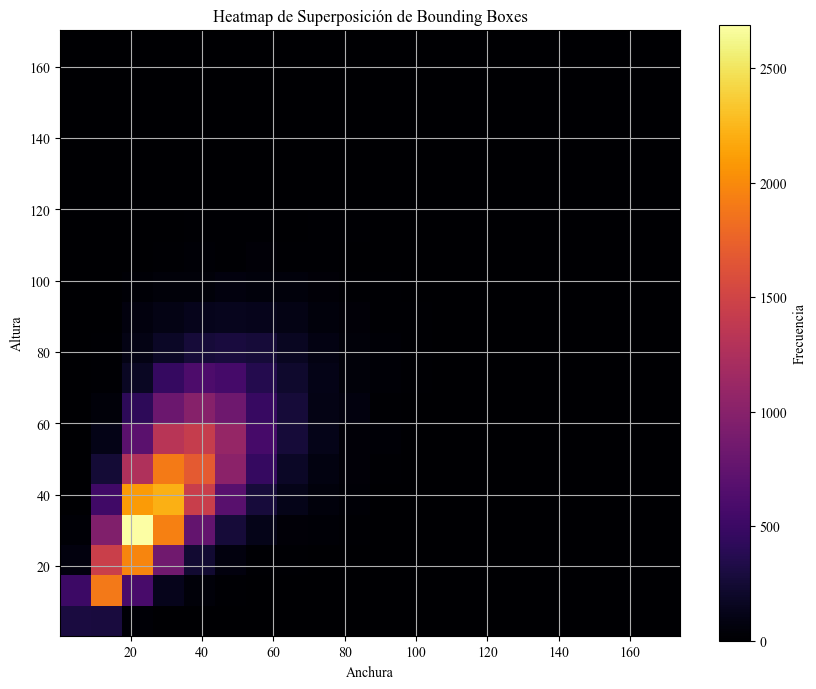

In [31]:
heatmap, xedges, yedges = np.histogram2d(bounding_box_widths, bounding_box_heights, bins=20)
plt.figure(figsize=(10, 8))
plt.imshow(heatmap.T, origin='lower', cmap='inferno', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Frecuencia')
plt.title('Heatmap de Superposición de Bounding Boxes')
plt.xlabel('Anchura')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

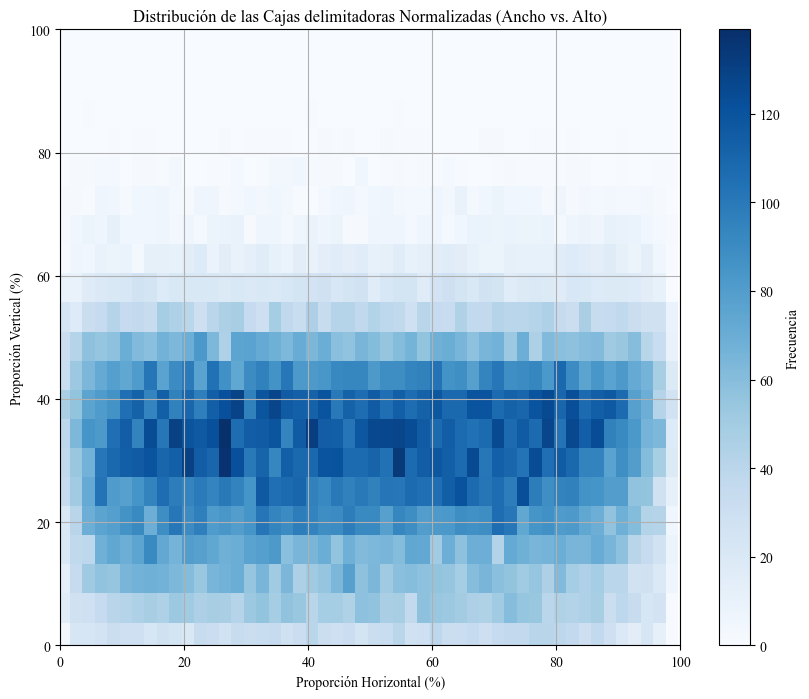

In [32]:
x_ratios = []
y_ratios = []
width_ratios = []
height_ratios = []

# Extraer las proporciones de las cajas
for item in data:
    image_width = item['item']['slots'][0]['width']
    image_height = item['item']['slots'][0]['height']
    annotations = item.get('annotations', [])
    for annotation in annotations:
        bounding_box = annotation.get('bounding_box', {})
        x_ratio = bounding_box.get('x', 0) / image_width * 100
        y_ratio = bounding_box.get('y', 0) / image_height * 100
        width_ratio = bounding_box.get('w', 0) / image_width * 100
        height_ratio = bounding_box.get('h', 0) / image_height * 100
        x_ratios.append(x_ratio)
        y_ratios.append(y_ratio)
        width_ratios.append(width_ratio)
        height_ratios.append(height_ratio)

# Histograma bidimensional de las proporciones
plt.figure(figsize=(10, 8))
plt.hist2d(x_ratios, y_ratios, bins=50, cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Distribución de las Cajas delimitadoras Normalizadas (Ancho vs. Alto)')
plt.xlabel('Proporción Horizontal (%)')
plt.ylabel('Proporción Vertical (%)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

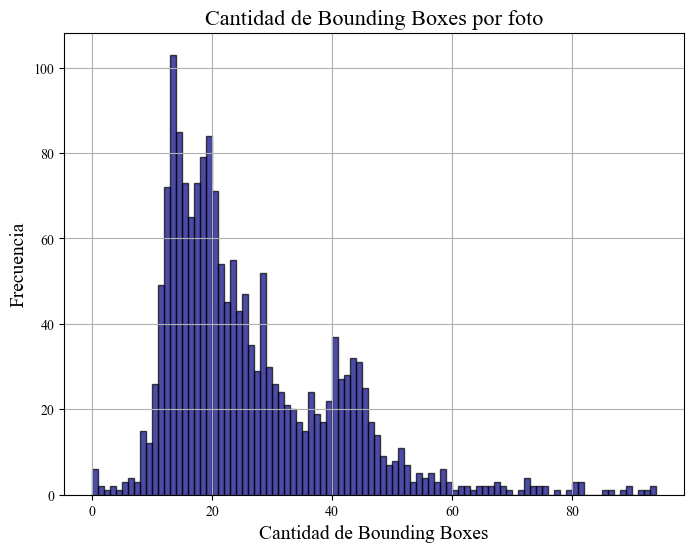

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(bounding_box_counts, bins=range(min(bounding_box_counts), max(bounding_box_counts) + 1), color='navy', edgecolor='black', alpha=0.7)
plt.title('Cantidad de Bounding Boxes por foto', fontsize=16)
plt.xlabel('Cantidad de Bounding Boxes', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True)
plt.show()

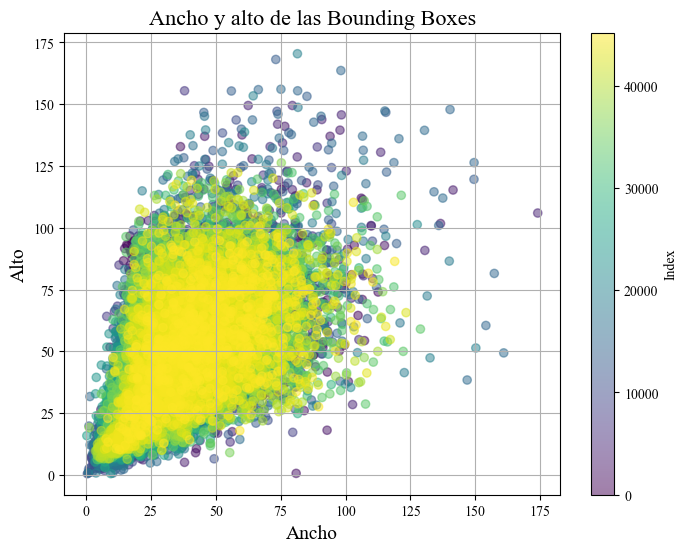

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(bounding_box_widths, bounding_box_heights, c=range(len(bounding_box_widths)), cmap='viridis', alpha=0.5)
plt.title('Ancho y alto de las Bounding Boxes', fontsize=16)
plt.xlabel('Ancho', fontsize=14)
plt.ylabel('Alto', fontsize=14)
plt.grid(True)
plt.colorbar(label='Index')
plt.show()

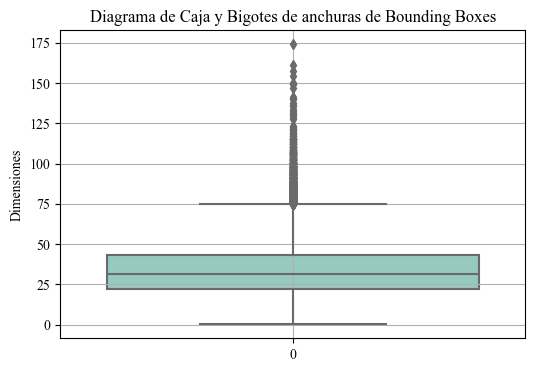

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=bounding_box_widths, palette='Set3')
plt.title('Diagrama de Caja y Bigotes de anchuras de Bounding Boxes')
# plt.xticks([0, 1], ['Ancho', 'Alto'])
plt.ylabel('Dimensiones')
plt.grid(True)
plt.show()

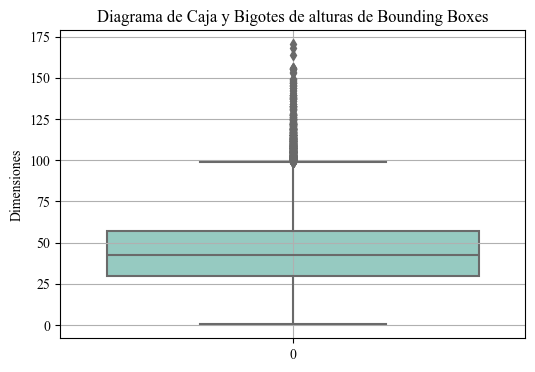

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=bounding_box_heights, palette='Set3')
plt.title('Diagrama de Caja y Bigotes de alturas de Bounding Boxes')
# plt.xticks([0, 1], ['Ancho', 'Alto'])
plt.ylabel('Dimensiones')
plt.grid(True)
plt.show()

# Brillo

In [37]:
brightness_values = []

for filename in os.listdir(images_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(images_dir, filename)
        image = Image.open(image_path)
        # Convertir la imagen a escala de grises y calcular la luminancia promedio
        brightness = np.array(image.convert('L')).mean()
        brightness_values.append(brightness)

plt.figure(figsize=(8, 6))
plt.hist(brightness_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del Brillo de las Imágenes')
plt.xlabel('Luminancia Promedio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

# Hue

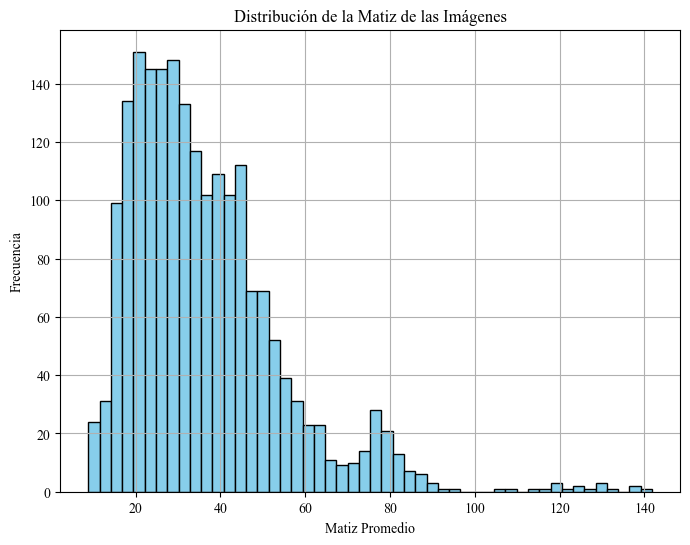

In [ ]:
hue_values = []

for filename in os.listdir(images_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Leer la imagen
        image_path = os.path.join(images_dir, filename)
        image = Image.open(image_path)
        # Convertir la imagen a espacio de color HSV
        image_hsv = image.convert('HSV')
        # Calcular la matiz promedio
        hues = []
        for pixel in image_hsv.getdata():
            hues.append(pixel[0])  # Hue está en el primer canal
        mean_hue = np.mean(hues)
        hue_values.append(mean_hue)

plt.figure(figsize=(8, 6))
plt.hist(hue_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Matiz de las Imágenes')
plt.xlabel('Matiz Promedio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

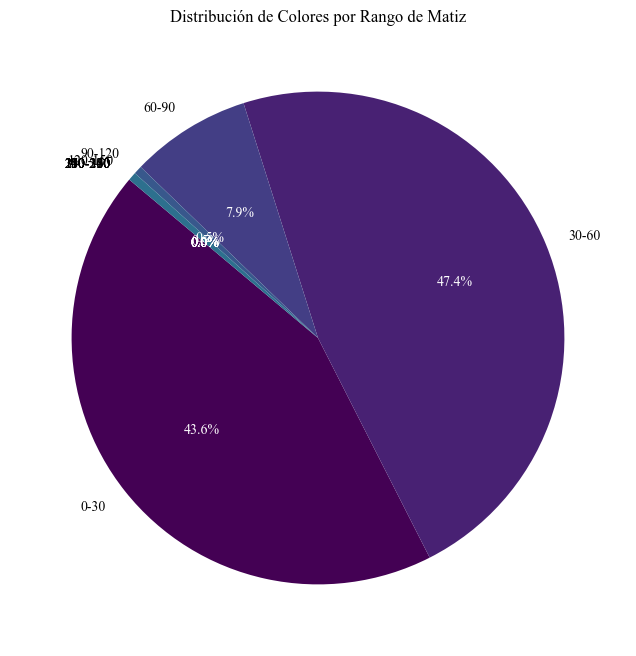

In [ ]:
hue_ranges = [(0, 30), (30, 60), (60, 90), (90, 120), (120, 150), (150, 180),
              (180, 210), (210, 240), (240, 270), (270, 300), (300, 330), (330, 360)]

hue_counts = [len([hue for hue in hue_values if range[0] <= hue < range[1]]) for range in hue_ranges]

hue_labels = [f"{range[0]}-{range[1]}" for range in hue_ranges]

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(hue_counts, labels=hue_labels, startangle=140, autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(hue_ranges))))

for autotext in autotexts:
    autotext.set_color('white')  
    autotext.set_fontsize(10)  

plt.title('Distribución de Colores por Rango de Matiz', fontsize=12)
plt.show()

# Saturacion

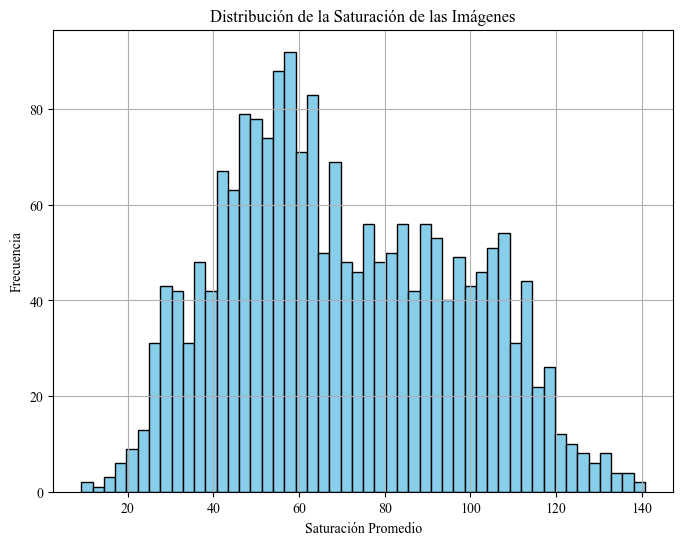

In [ ]:
saturation_values = []

for filename in os.listdir(images_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Leer la imagen
        image_path = os.path.join(images_dir, filename)
        image = Image.open(image_path)
        # Convertir la imagen a espacio de color HSV
        image_hsv = image.convert('HSV')
        # Calcular la saturación promedio
        saturations = []
        for pixel in image_hsv.getdata():
            saturations.append(pixel[1])  # Saturación está en el segundo canal
        mean_saturation = np.mean(saturations)
        saturation_values.append(mean_saturation)

plt.figure(figsize=(8, 6))
plt.hist(saturation_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Saturación de las Imágenes')
plt.xlabel('Saturación Promedio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

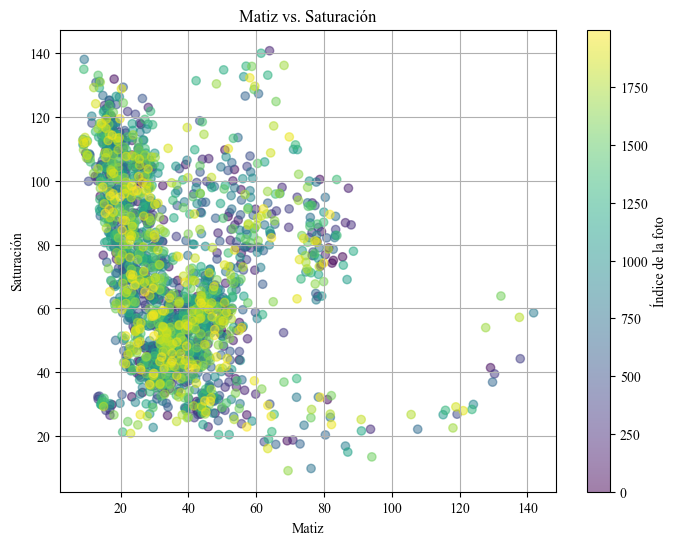

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(hue_values, saturation_values, c=range(len(saturation_values)), cmap='viridis', alpha=0.5)
plt.title('Matiz vs. Saturación')
plt.xlabel('Matiz')
plt.ylabel('Saturación')
plt.colorbar(label='Índice de la foto')  # Agregar la barra de colores para el índice de la foto
plt.grid(True)
plt.show()

# RGB

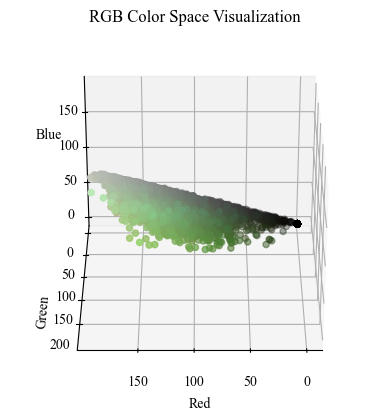

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image 
images_dir = "./images"
image_files = images_dir
num_images = len(image_files)

image_size = (100, 100)

rgb_values = np.zeros((num_images * image_size[0] * image_size[1], 3), dtype=np.uint8)

for filename in os.listdir(images_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(images_dir, filename)
        img = Image.open(image_path)
    img = img.resize(image_size)  
    img_rgb = np.array(img.convert('RGB'))
    
    rgb_values[i * image_size[0] * image_size[1]: (i + 1) * image_size[0] * image_size[1]] = img_rgb.reshape(-1, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = rgb_values[:, 0]
g = rgb_values[:, 1]
b = rgb_values[:, 2]

ax.scatter(r, g, b, c=rgb_values / 255.0, marker='o')

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('RGB Color Space Visualization')

ax.view_init(elev=30, azim=90)  

plt.show()

# Day & Night Classifier